In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [3]:
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

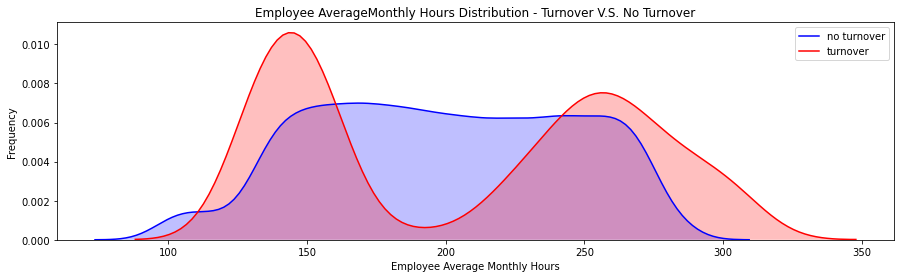

In [4]:
# Turnover V.S. AverageMonthlyHours

fig = plt.figure(figsize=(15,4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b', shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r', shade=True, label='turnover')

ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')

plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')


How should we deal with groups of employees who left the company:
had less hours of work and had too many hours of work?

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

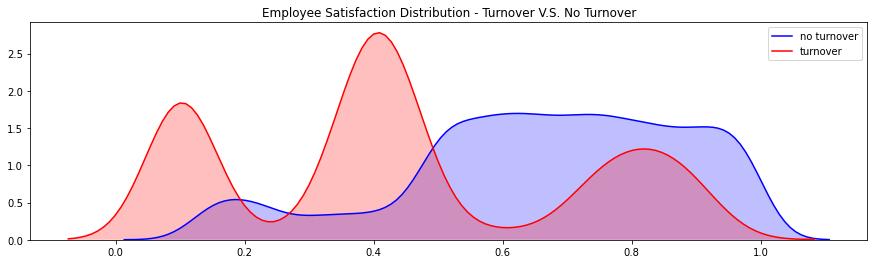

In [5]:
# Turnover V.S. Satisfaction

fig = plt.figure(figsize=(15,4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'], color='b', shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'],color='r', shade=True, label='turnover')

plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')


Can you guess that whyemployees with the high satisfaction level still left the company?

Ans. They might think that they don't earn appropriated with their skills or works.

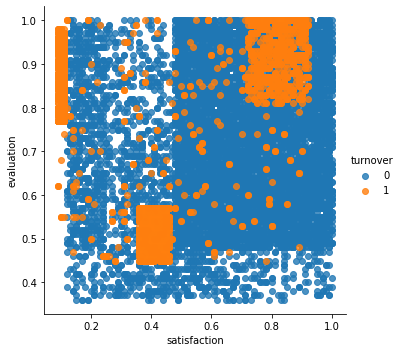

In [6]:
# Satisfaction V.S. Evaluation

sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')

How many clusters for employees who left the company?
Ans. 3 clusters

Which clusters show the hard-working and sad employee?
Ans. Top-left corner clusters


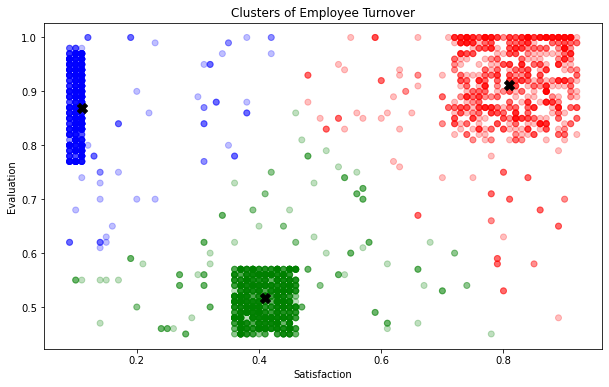

In [7]:
# Using K-Means Clustering to analyze

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")

plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# Red one should be keep.

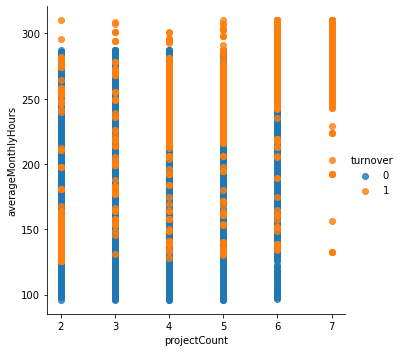

In [8]:
#  project count V.S. average monthly hours

sns.lmplot(x='projectCount', y='averageMonthlyHours', data=df, fit_reg=False, hue='turnover')

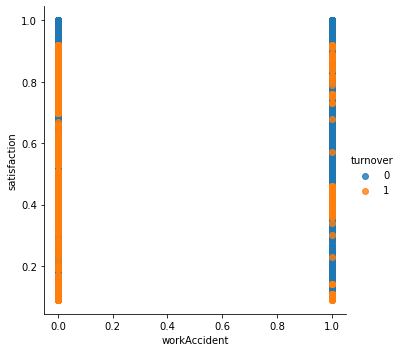

In [9]:
# work accident V.S. satisfaction

sns.lmplot(x='workAccident', y='satisfaction', data=df, fit_reg=False, hue='turnover')

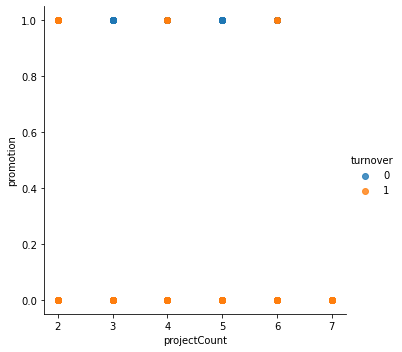

In [10]:
# project count V.S. promotion

sns.lmplot(x='projectCount', y='promotion', data=df, fit_reg=False, hue='turnover')

In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


In [12]:
# Create train and test splits
target_name = 'turnover'

X = df.drop('turnover', axis=1)
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced", min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

In [13]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

In [14]:
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced", min_weight_fraction_leaf=0.01)

In [15]:
# Decision tree is most explainable